In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import july

In [2]:
plt.style.use('lenk')
# 008fd5, fc4f30, e5ae38, 6d904f, 8b8b8b, 810f7c
# blue,   red,    yellow, green,  gray,   purple

# Data prep

In [3]:
df = pd.read_csv('wind.csv')
df.head()

,year,month,day,hour,wind
0,2004,1,1,0,4.3
1,2004,1,1,1,5.4
2,2004,1,1,2,6.3
3,2004,1,1,3,4.8
4,2004,1,1,4,5.2


In [4]:
# hours 12-20, year 2011 and onwards
df_daily = df.loc[(df['hour']>=12)&(df['hour']<=20)]
df_daily = df.loc[(df['year']>=2011)]

In [5]:
# take mean wind per day
df_daily = df_daily.groupby(['year', 'month', 'day'])[['wind']].mean().reset_index()

# get date and then day of year
df_daily['date'] = pd.to_datetime(
                        df_daily['year'].astype(str)+'-'+\
                        df_daily['month'].astype(str)+'-'+\
                        df_daily['day'].astype(str))
df_daily['day_of_year'] = df_daily['date'].dt.dayofyear

# pivot
df_daily = df_daily.pivot(index='day_of_year', columns='year', values='wind')

df_daily.head()

year,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
day_of_year,,,,,,,,,,,,
1,5.962500,1.983333,5.020833,3.741667,4.400000,3.025000,1.962500,3.612500,3.575000,3.666667,1.683333,2.354167
2,2.175000,5.583333,3.425000,3.145833,6.829167,1.758333,1.679167,4.512500,7.004167,4.945833,2.200000,3.729167
3,0.279167,3.312500,2.379167,3.041667,8.116667,2.695833,2.033333,3.133333,4.516667,6.779167,1.570833,2.262500
4,0.512500,6.270833,1.929167,3.950000,4.766667,1.979167,7.437500,3.670833,3.375000,4.187500,1.020833,2.654167
5,0.758333,3.862500,3.479167,2.858333,4.987500,2.283333,7.537500,3.637500,4.570833,3.291667,2.529167,2.108333


# Daily wind 2011-2021

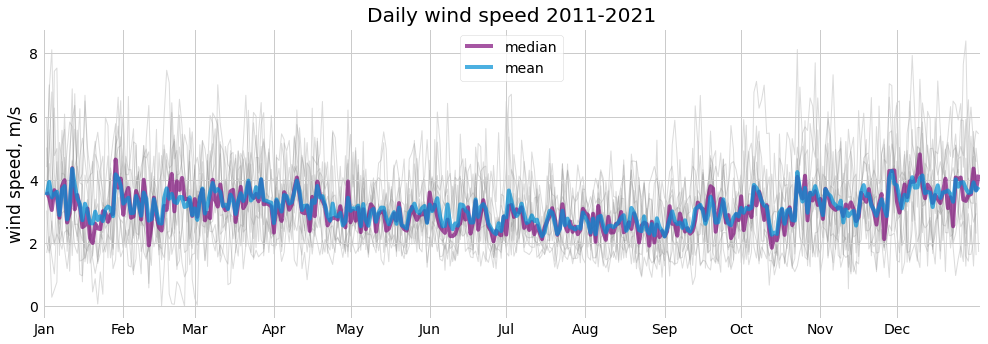

In [6]:
plt.figure(figsize=(15, 5))

for year in df_daily.columns[:-1]:
    plt.plot(df_daily[year], c='#8b8b8b', zorder=-99, alpha=.3, linewidth=1)
        
plt.plot(df_daily.loc[:,:2021].median(axis=1), c='#810f7c', alpha=.7, zorder=1, label='median')
plt.plot(df_daily.loc[:,:2021].mean(axis=1), c='#008fd5', alpha=.7, zorder=1, label='mean')
        
# ticks and labels
ticks = np.cumsum([-1, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30])+1
ticks = [i for i in ticks if i <= len(df_daily)]
labels = [x[:3] for x in calendar.month_name if x][:len(ticks)]
plt.xticks(ticks=ticks, labels=labels)
plt.xlim(-1, 367)

plt.title(f'Daily wind speed {min(df_daily.columns)}-{max(df_daily.columns[:-1])}')
plt.ylabel('wind speed, m/s')
plt.legend()

plt.savefig('img/year.png', bbox_inches='tight', dpi=200)

plt.show()

# Daily wind 2011-2021, rolling 

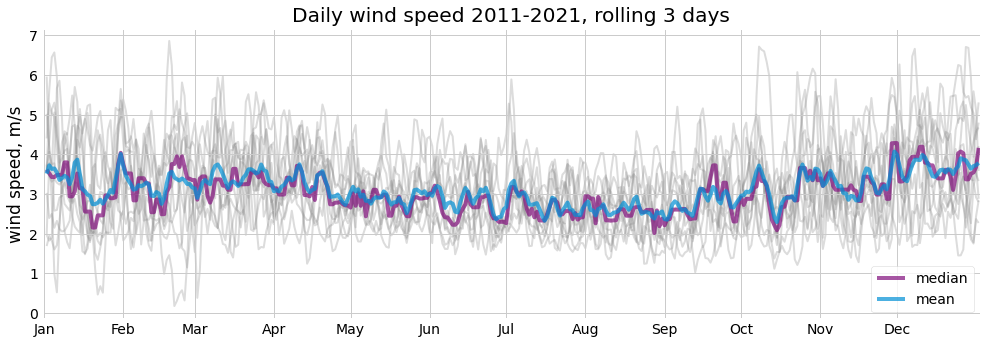

In [7]:
plt.figure(figsize=(15, 5))

rolling_days = 3

for year in df_daily.columns[:-1]:
    plt.plot(df_daily[year].rolling(rolling_days,1).mean(), c='#8b8b8b', zorder=-99, alpha=.3, linewidth=2)
        
plt.plot(df_daily.loc[:,:2021].median(axis=1).rolling(rolling_days,1).median(), 
         c='#810f7c', alpha=.7, zorder=1, label='median')
plt.plot(df_daily.loc[:,:2021].mean(axis=1).rolling(rolling_days,1).mean(), 
         c='#008fd5', alpha=.7, zorder=1, label='mean')
        
# ticks and labels
ticks = np.cumsum([-1, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30])+1
ticks = [i for i in ticks if i <= len(df_daily)]
labels = [x[:3] for x in calendar.month_name if x][:len(ticks)]
plt.xticks(ticks=ticks, labels=labels)
plt.xlim(-1, 367)

plt.title(f'Daily wind speed {min(df_daily.columns)}-{max(df_daily.columns[:-1])}, rolling {rolling_days} days')
plt.ylabel('wind speed, m/s')
plt.legend()

plt.savefig('img/year-rolling.png', bbox_inches='tight', dpi=200)

plt.show()

# Daily wind, January-April

In [8]:
df_daily = df_daily.head(121) # 121th day is May 1st

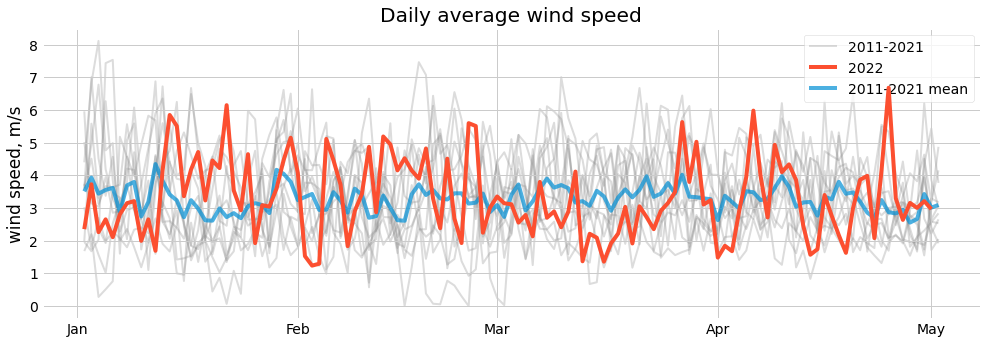

In [9]:
plt.figure(figsize=(15, 5))

for year in df_daily.columns:
    if year == 2022:
        plt.plot(df_daily[year], label=year, c='#fc4f30', zorder=99)
    else:
        if year == 2021:
            plt.plot(df_daily[year], c='#8b8b8b', zorder=-99, alpha=.3, linewidth=2, label='2011-2021')
        else:
            plt.plot(df_daily[year], c='#8b8b8b', zorder=-99, alpha=.3, linewidth=2)
        
        
plt.plot(df_daily.loc[:,:2021].mean(axis=1), c='#008fd5', alpha=.7, zorder=1, label='2011-2021 mean')
        
# ticks and labels
ticks = np.cumsum([-1, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30])+1
ticks = [i for i in ticks if i <= len(df_daily)]
labels = [x[:3] for x in calendar.month_name if x][:len(ticks)]
plt.xticks(ticks=ticks, labels=labels)

plt.title('Daily average wind speed')
plt.ylabel('wind speed, m/s')
plt.legend()

plt.savefig('img/day.png', bbox_inches='tight', dpi=200)

plt.show()

In [10]:
current_year = df_daily[2022][:120]
past_years = df_daily.loc[:,:2021].median(axis=1)[:120]
diff = past_years - current_year
diff.index = pd.to_datetime(2022 * 1000 + diff.index, format='%Y%j')

In [11]:
print('Days when 2022 has been less windy:', sum(diff>0))
print('Days when 2022 has been more windy:', sum(diff<0))

Days when 2022 has been less windy: 59
Days when 2022 has been more windy: 61


# Daily wind, January-April, rolling

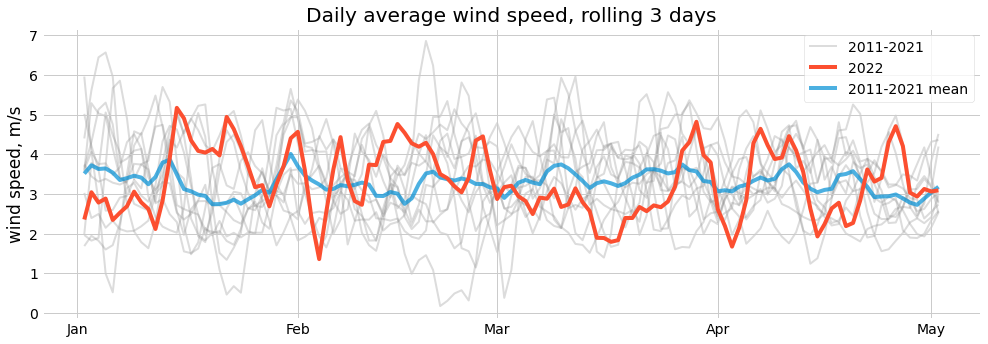

In [12]:
plt.figure(figsize=(15, 5))

rolling_days = 3

for year in df_daily.columns:
    if year == 2022:
        plt.plot(df_daily[year].rolling(rolling_days,1).mean(), c='#fc4f30', zorder=99, label='2022')
    elif year == 2021:
        plt.plot(df_daily[year].rolling(rolling_days,1).mean(), c='#8b8b8b', zorder=-99, alpha=.3, linewidth=2, 
                 label='2011-2021')
    else:
        plt.plot(df_daily[year].rolling(rolling_days,1).mean(), c='#8b8b8b', zorder=-99, alpha=.3, linewidth=2)
        
plt.plot(df_daily.loc[:,:2021].mean(axis=1).rolling(rolling_days,1).mean(), c='#008fd5', alpha=.7, zorder=1, 
         label='2011-2021 mean')
        
# ticks and labels
ticks = np.cumsum([-1, 31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30])+1
ticks = [i for i in ticks if i <= len(df_daily)]
labels = [x[:3] for x in calendar.month_name if x][:len(ticks)]
plt.xticks(ticks=ticks, labels=labels)

plt.title(f'Daily average wind speed, rolling {rolling_days} days')
plt.ylabel('wind speed, m/s')
plt.legend()

plt.savefig('img/day-rolling.png', bbox_inches='tight', dpi=200)

plt.show()

In [13]:
current_year_roll = df_daily[2022].rolling(rolling_days, 1).mean()[:120]
past_years_roll = df_daily.loc[:,:2021].median(axis=1).rolling(rolling_days, 1).mean()[:120]
diff_roll = past_years_roll - current_year_roll
diff_roll.index = pd.to_datetime(2022 * 1000 + diff_roll.index, format='%Y%j')

In [14]:
print('Days when 2022 has been less windy:', sum(diff_roll>0))
print('Days when 2022 has been more windy:', sum(diff_roll<0))

Days when 2022 has been less windy: 62
Days when 2022 has been more windy: 58


# Calendar

In [15]:
def scale(x, data_min=diff.min(), data_max=diff.max()):
    # values below 0 are scaled from -1...0
    # values above 0 are scaled from 0...1
    # https://stats.stackexchange.com/questions/281162/scale-a-number-between-a-range
    if x < 0:
        r_min, r_max, t_min, t_max = data_min, 0, -1, -0.00001
    else:
        r_min, r_max, t_min, t_max = 0, data_max, 0, 1
        
    return (x - r_min) / (r_max - r_min) * (t_max - t_min) + t_min

In [16]:
diff_scaled = diff.apply(scale)

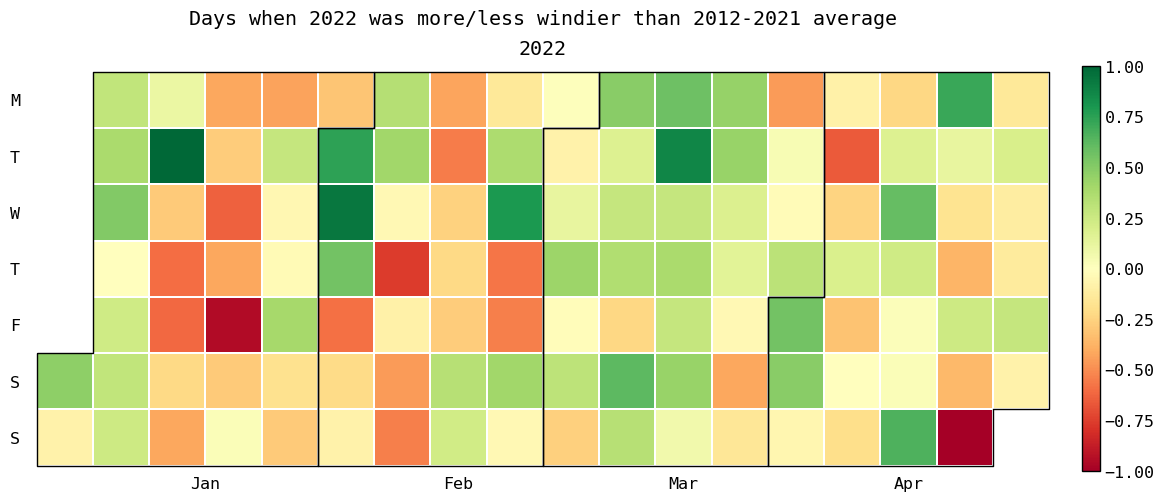

In [17]:
july.heatmap(diff.index, diff_scaled, 
             title='Days when 2022 was more/less windier than 2012-2021 average', 
             cmap='RdYlGn', month_grid=True, horizontal=True, colorbar=True);

plt.savefig('img/calendar.png', bbox_inches='tight', dpi=200)

In [18]:
diff_roll_scaled = diff_roll.apply((lambda x: scale(x, diff_roll.min(), diff_roll.max())))

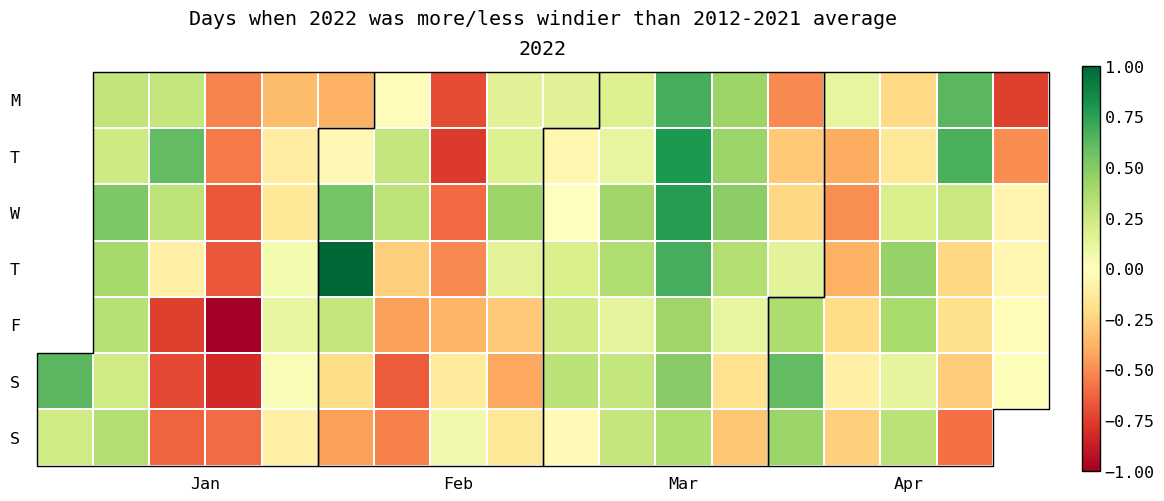

In [19]:
july.heatmap(diff_roll.index, diff_roll_scaled, 
             title='Days when 2022 was more/less windier than 2012-2021 average', 
             cmap='RdYlGn', month_grid=True, horizontal=True, colorbar=True);

plt.savefig('img/calendar-rolling.png', bbox_inches='tight', dpi=200)